In [52]:
https://gravityandlevity.wordpress.com/2009/07/08/your-body-wasnt-built-to-last-a-lesson-from-human-mortality-rates/
https://www.ined.fr/en/everything_about_population/population-games/tomorrow-population/
https://en.wikipedia.org/wiki/Gompertz%E2%80%93Makeham_law_of_mortality

,age,male
6,0,57094
7,1,55165
8,2,56883
9,3,57829
10,4,58474
...,...,...
103,97,312
104,98,189
105,99,95
106,100+,104


In [ ]:
import pandas as pd

file_path = "data/men.xlsx"
df = pd.read_excel(file_path)
df = df.iloc[:, :2]

df.rename(columns={'Unnamed: 0': 'age'}, inplace=True)
df.rename(columns={'Věkové složení mužů k 1. 1. 2022': 'male'}, inplace=True)

df = df.iloc[6:]


df

In [115]:
file_path = "data/women.xlsx"
d = pd.read_excel(file_path)
d = d.iloc[:, :2]

d.rename(columns={'Unnamed: 0': 'age'}, inplace=True)
d.rename(columns={'Věkové složení žen k 1. 1. 2022': 'female'}, inplace=True)

d = d.iloc[6:107]

d

,age,female
6,0,54565
7,1,52855
8,2,54017
9,3,55497
10,4,55719
...,...,...
102,96,2029
103,97,1435
104,98,975
105,99,575


In [ ]:
dahoj = pd.DataFrame({'Age': ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'], 
                    'Male': [9000, 14000, 22000, 26000, 34000, 32000, 29000, 22000, 14000, 3000], 
                    'Female': [8000, 15000, 19000, 28000, 35000, 34000, 28000, 24000, 17000, 5000]})
dahoj


In [180]:
merged_df = pd.merge(df, d, on='age', how='inner')
merged_df = merged_df.iloc[:101]


# merged_df.head(30)
merged_df['male'] = merged_df['male'] 
merged_df.shape

def custom_grouping(index):
    return index // 2

# Group the DataFrame using the custom grouping function and sum each group
summed_df = merged_df.groupby(custom_grouping).sum()
summed_df.shape

(51, 3)

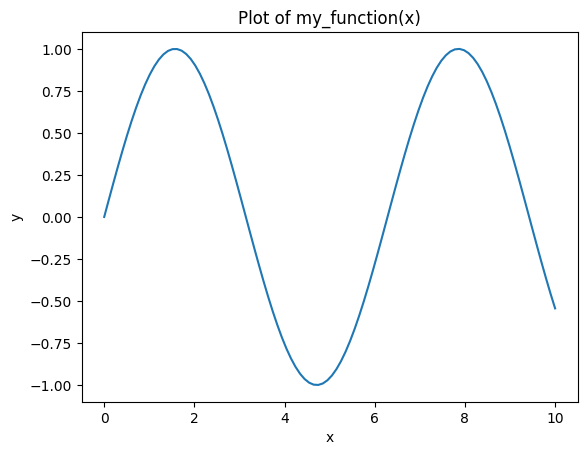

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Define your function
def my_function(x):
    return np.sin(x)

# Generate input values from 0 to 10
x_values = np.linspace(0, 10, 100)  # Adjust the number of points (100) for smoother or coarser plots

# Calculate corresponding y values using your function
y_values = my_function(x_values)

# Plot the function
plt.plot(x_values, y_values)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of my_function(x)')

# Show the plot
plt.show()


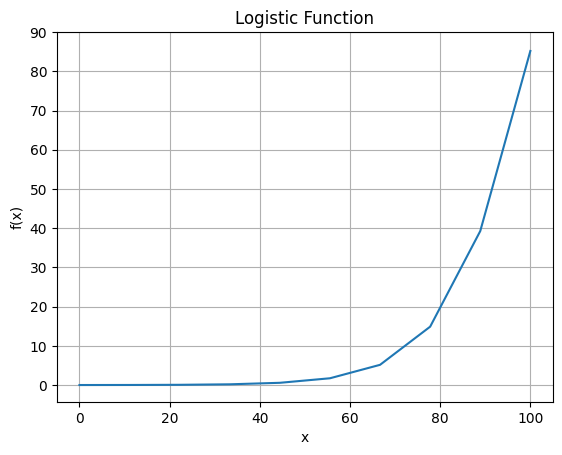

In [12]:
import numpy as np

def logistic_function(x, k, x0):
    return 1 / (0.005 + np.exp(-k * (x - x0)))

# Define parameters
k = 0.1  # Adjust the growth rate parameter
x0 = 50  # Adjust the midpoint parameter

# Generate input values from 0 to 100
x_values = np.linspace(0, 100, 10)

# Calculate corresponding y values using the logistic function
y_values = logistic_function(x_values, k, x0)

# Plot the logistic function
import matplotlib.pyplot as plt
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Logistic Function')
plt.grid(True)
plt.yticks(np.arange(0,100,10))
plt.show()



In [234]:
# print(logistic_function(100, k, x0) /100)
def logistic_function(x):
    return 1 / (0.005 + np.exp(-0.1 * (x - 50)))

probs = np.linspace(0, 100, 51)
probs = logistic_function(probs)
probs /= 100
probs = 1 - probs
wtf = pd.DataFrame(probs, columns=['probies']).to_numpy()


In [269]:

yuh = summed_df.iloc[:, 1:] 
# a = pd.DataFrame([1,2,3])
# b = pd.DataFrame([2,3,4])
x_male = df['male']
df = merged_df.groupby(custom_grouping).sum()
# x_male = pd.DataFrame(x_male)
huh = x_male.to_frame().mul(wtf, axis = 0)

huh = huh.shift(periods=1)
huh.fillna(69, limit=1)



C:\Users\timib\AppData\Local\Temp\ipykernel_15004\24771153.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  huh.fillna(69, limit=1)


,male
0,69.000000
1,112251.436303
2,114702.559881
3,116694.269494
4,113906.014513
5,111399.293781
6,116674.628339
7,122043.694829
8,114240.780901
9,104077.260218
